<a href="https://colab.research.google.com/github/BenMeehan/Exploratory-Data-Analysis/blob/main/stellar_xrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stellar Dataset**

https://www.kaggle.com/adebayo/stellar-cryptocurrency-dataset

In [ ]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Reading the csv file

df=pd.read_csv("stellar.csv")

# **Exploratory Data Analysis**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.002988,0.003128,0.002928,0.003072,0.003072,118073.0
1,2014-09-18,0.003081,0.003768,0.003055,0.003456,0.003456,205474.0
2,2014-09-19,0.003460,0.004026,0.003160,0.003872,0.003872,204649.0
3,2014-09-20,0.003936,0.004304,0.003309,0.003612,0.003612,186971.0
4,2014-09-21,0.003610,0.003862,0.003296,0.003464,0.003464,145626.0


In [ ]:
# Checking NaN in each column
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
# Replace null values with median
df.fillna(df.median)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.002988,0.003128,0.002928,0.003072,0.003072,118073
1,2014-09-18,0.003081,0.003768,0.003055,0.003456,0.003456,205474
2,2014-09-19,0.00346,0.004026,0.00316,0.003872,0.003872,204649
3,2014-09-20,0.003936,0.004304,0.003309,0.003612,0.003612,186971
4,2014-09-21,0.00361,0.003862,0.003296,0.003464,0.003464,145626
...,...,...,...,...,...,...,...
2597,2021-10-27,0.373172,0.375486,0.314517,0.330756,0.330756,9.94506e+08
2598,2021-10-28,0.330741,0.348705,0.32625,0.342805,0.342805,8.4832e+08
2599,2021-10-29,0.342729,0.362998,0.341086,0.361649,0.361649,6.43201e+08
2600,2021-10-30,0.36157,0.365488,0.35174,0.358615,0.358615,6.16127e+08


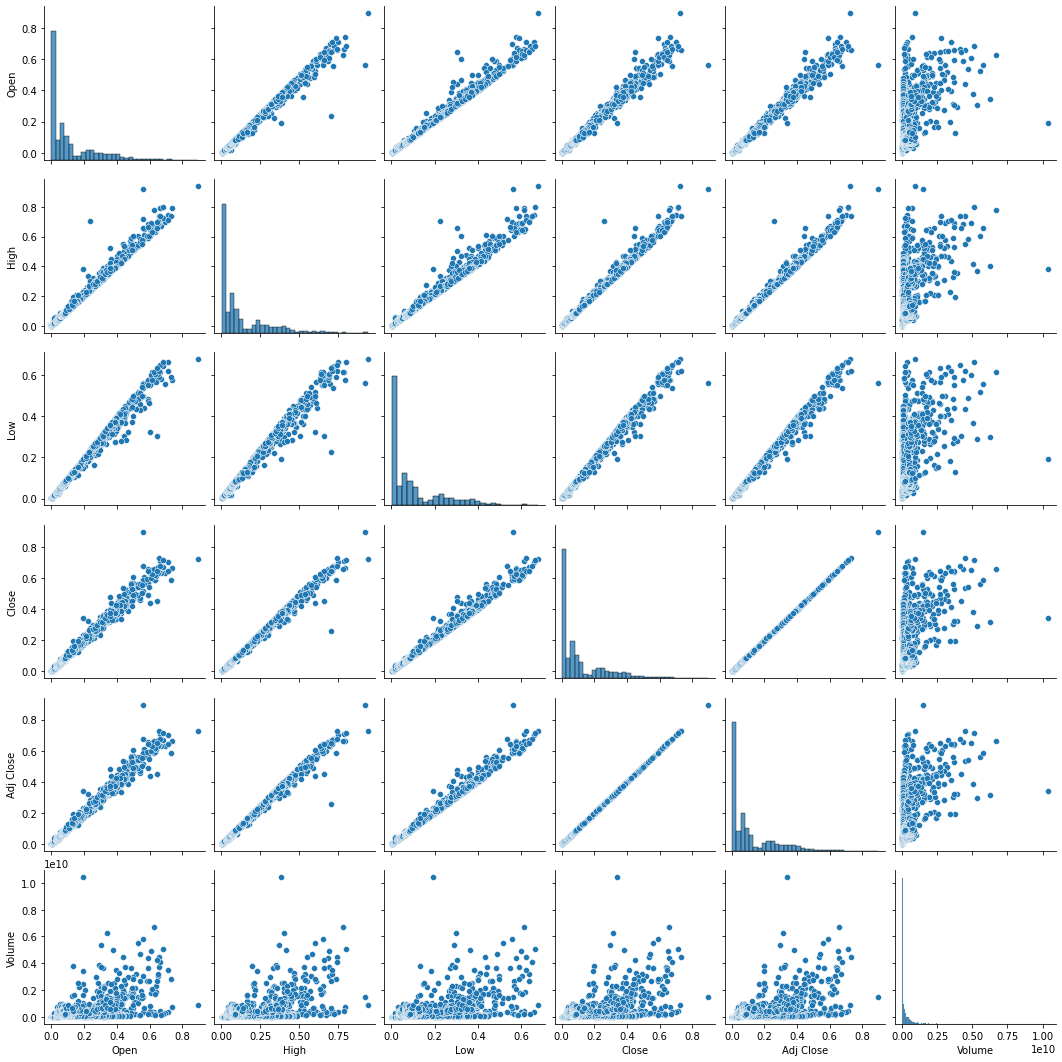

In [ ]:
# pair plot
sns.pairplot(df)

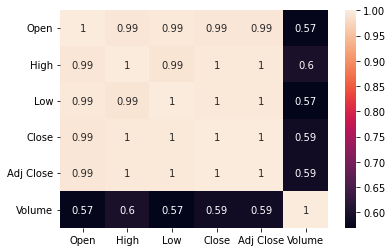

In [ ]:
# Heatmap to check for correlation 
sns.heatmap(df.corr(),annot=True)

In [ ]:
print(df['Close'].duplicated().any())

# Close and Adj Close seem to be duplicated. So drop Adj Close
df=df.drop('Adj Close',axis=1)

True


In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.002988,0.003128,0.002928,0.003072,1.180730e+05
1,2014-09-18,0.003081,0.003768,0.003055,0.003456,2.054740e+05
2,2014-09-19,0.003460,0.004026,0.003160,0.003872,2.046490e+05
3,2014-09-20,0.003936,0.004304,0.003309,0.003612,1.869710e+05
4,2014-09-21,0.003610,0.003862,0.003296,0.003464,1.456260e+05
...,...,...,...,...,...,...
2597,2021-10-27,0.373172,0.375486,0.314517,0.330756,9.945057e+08
2598,2021-10-28,0.330741,0.348705,0.326250,0.342805,8.483204e+08
2599,2021-10-29,0.342729,0.362998,0.341086,0.361649,6.432012e+08
2600,2021-10-30,0.361570,0.365488,0.351740,0.358615,6.161267e+08


In [ ]:
# Converting Date column from String to DateTime for easier plotting

df['Date']=pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<BarContainer object of 2602 artists>

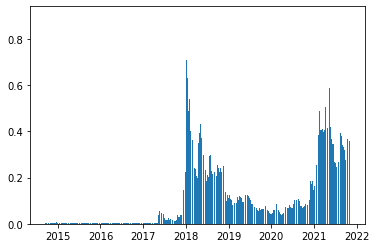

In [ ]:
plt.bar(df['Date'].values,df['Close'])

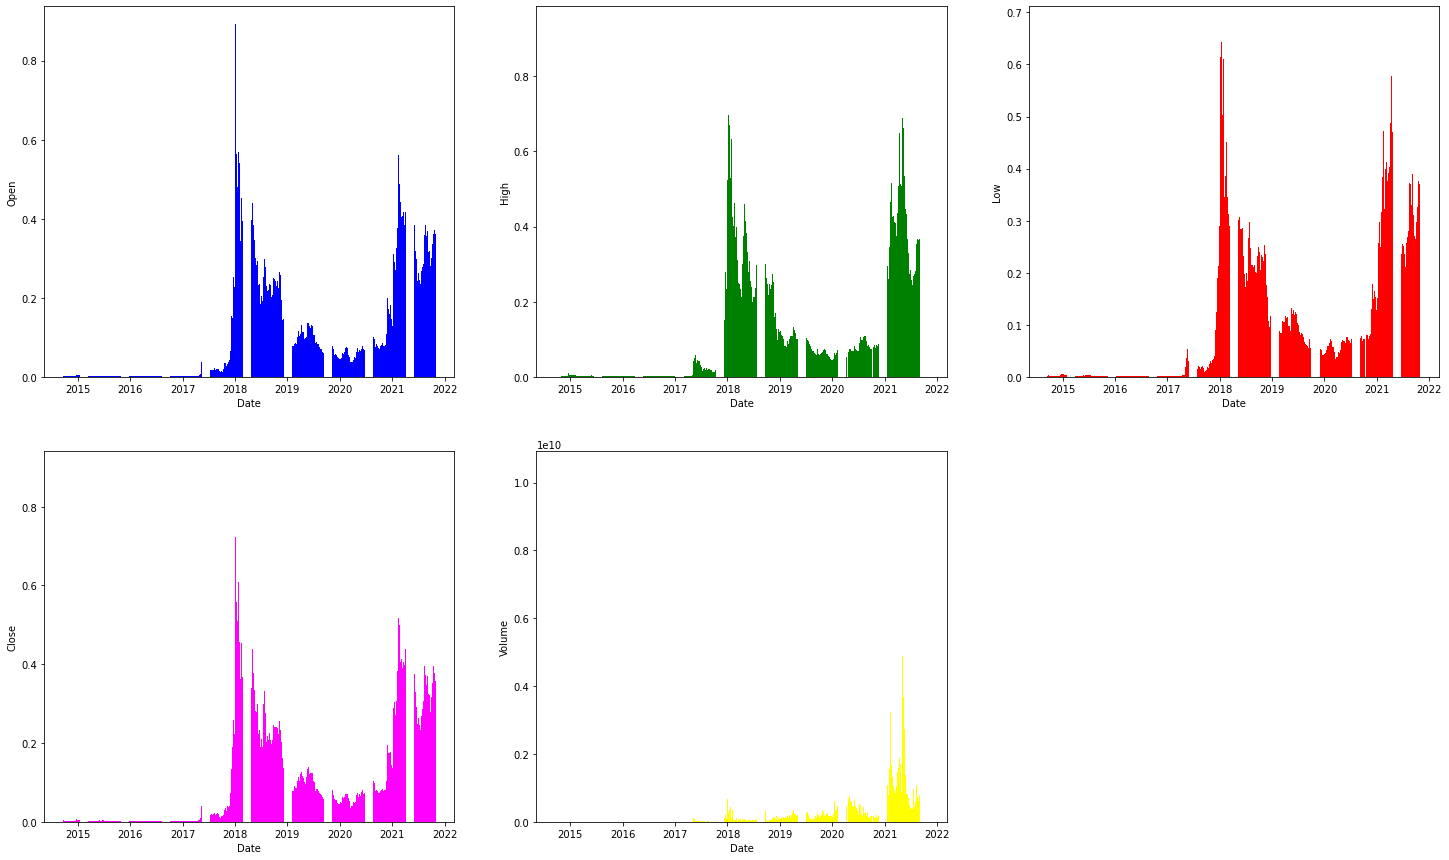

In [ ]:
# Bar plot of each column w.r.t Date

li=list(df.columns)
li.pop(0)

colors=['blue','green','red','magenta','yellow']

plt.figure(figsize=(25,15))
for i in range(1,6):
  plt.subplot(2,3,i)
  plt.bar(df['Date'],df[li[i-1]],color=colors[i-1])
  plt.xlabel('Date')
  plt.ylabel(li[i-1])

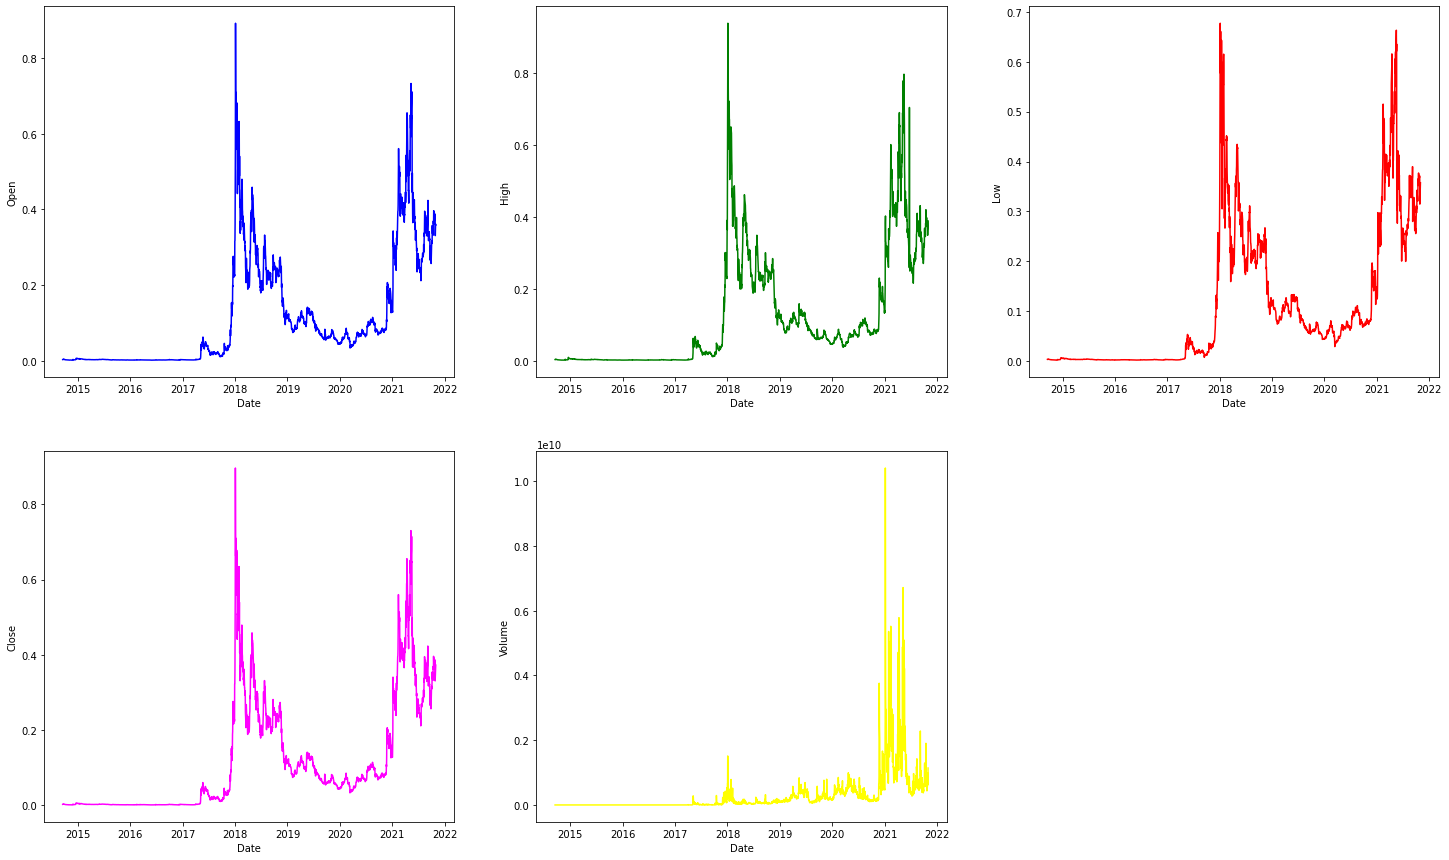

In [ ]:
# Line plot of each column w.r.t Date

plt.figure(figsize=(25,15))
for i in range(1,6):
  plt.subplot(2,3,i)
  plt.plot(df['Date'],df[li[i-1]],color=colors[i-1])
  plt.xlabel('Date')
  plt.ylabel(li[i-1])

**Observations**

*    There seems to be a spike in price around 2018 and mid-2021



# **Multivariate Linear Regression using Gradient Descent**

Predicting the closing price using linear regression.

In [ ]:
# Drop the Date column as it holds no significance in this context

df=df.drop('Date',axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.002988,0.003128,0.002928,0.003072,118073.0
1,0.003081,0.003768,0.003055,0.003456,205474.0
2,0.003460,0.004026,0.003160,0.003872,204649.0
3,0.003936,0.004304,0.003309,0.003612,186971.0
4,0.003610,0.003862,0.003296,0.003464,145626.0


In [ ]:
# Seperating features from target
X=df[['High','Open','Low','Volume']]
y=df['Close']

# Replacing NaN values with mean
X=X.fillna(X.mean())
y=y.fillna(y.mean())

In [ ]:
# Splitting into training and testing datasets

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
# theta is the array of coefficents in hypothesis

theta=np.zeros(5)

In [ ]:
theta

array([0., 0., 0., 0., 0.])

In [ ]:
# Converting dataframe to numpy arrays

X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
# Adding intercept column

X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [ ]:
X_train.shape

(1951, 5)

In [ ]:
# Cost function

def costFunction(X,y,theta):
  m=len(X)
  cost=0
  for i in range(len(X)):
    cost+=(1/m)*((sum(X[i]*theta)-y[i])**2) 
  print(cost)

y_train=y_train.reshape(-1,1)


In [ ]:
costFunction(X_train,y_train,theta)

[0.03492913]


In [ ]:
# Data preprocessing 

# Standardisation - Remove non-zero mean and make variance 1

from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)


# Gradient Descent Algorithm

def gradientDescent(X,y,theta,alpha,iter):
  m=len(X)
  for _ in range(iter):
    slope=np.zeros(len(X[0]))
    for i in range(m):    
      for j in range(len(X[0])):
        slope[j]+=(-2/m)*(y[i]-sum(theta*X[i]))*X[i][j]
    theta=theta-(alpha*slope)
  return theta

theta=gradientDescent(X_train,y_train,theta,0.01,300)
theta

array([0.        , 0.0488456 , 0.04719074, 0.04941364, 0.00328906])